Task 1
  
  Dataset in the given link was removed or not accessible now. The dataset was taken from github (https://github.com/HoaNP/NSL-KDD-DataSet/tree/master) and it was in the form of Attribute-Relation File Format (ARFF). The dataset was already splited into test and training sets

         KDDTrain+.ARFF: The full NSL-KDD train set with binary labels in ARFF format
         KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
         
  The code given below will convert the dataset into csv format

In [22]:
import pandas as pd
from scipy.io import arff

# Load ARFF file
data, meta = arff.loadarff('KDDTrain+.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Decode byte columns to strings (if necessary)
for col in df.select_dtypes([object]):
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Save as CSV
df.to_csv('output_dataset_train.csv', index=False)

# Print the first 5 rows to verify
print(df.head())


   duration protocol_type   service flag  src_bytes  dst_bytes land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0    0   
1       0.0           udp     other   SF      146.0        0.0    0   
2       0.0           tcp   private   S0        0.0        0.0    0   
3       0.0           tcp      http   SF      232.0     8153.0    0   
4       0.0           tcp      http   SF      199.0      420.0    0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0     0.0  0.0  ...               255.0   

  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                   0.17                    0.03                         0.17   
1                   0.00                    0.60        

Both test and train datset is combined and saved into merged_output.csv

In [24]:
import pandas as pd

# Load both CSV files
df1 = pd.read_csv('output_dataset_train.csv')
df2 = pd.read_csv('output_dataset_test.csv')

# Concatenate them row-wise
concatenated_df = pd.concat([df1, df2])

# Save the concatenated DataFrame as a new CSV file
concatenated_df.to_csv('merged_output.csv', index=False)

# Print the first 5 rows to verify
print(concatenated_df.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0     0   
1       0.0           udp     other   SF      146.0        0.0     0   
2       0.0           tcp   private   S0        0.0        0.0     0   
3       0.0           tcp      http   SF      232.0     8153.0     0   
4       0.0           tcp      http   SF      199.0      420.0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0     0.0  0.0  ...               255.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


data.head() is used to print first 5 lines of the datset

In [27]:
import pandas as pd

data = pd.read_csv('merged_output.csv')
print(data.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0     0   
1       0.0           udp     other   SF      146.0        0.0     0   
2       0.0           tcp   private   S0        0.0        0.0     0   
3       0.0           tcp      http   SF      232.0     8153.0     0   
4       0.0           tcp      http   SF      199.0      420.0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0     0.0  0.0  ...               255.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


display if any null values are present

In [28]:
print(data.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

covert the labels in the string format to binary format and split dataset into training set and testing set in 80:20 ratio


In [46]:
from sklearn.preprocessing import LabelEncoder

# Assuming the 'class' column contains 'normal' and 'anomaly'
labelencoder = LabelEncoder()

# Ensure that y is properly encoded to binary values (0 or 1)
y = labelencoder.fit_transform(data['class'])

# Now split the data again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This code imports the Perceptron class from sklearn.linear_model and creates a perceptron model with specified parameters for maximum iterations, learning rate, no penalty, and a fixed random state.

In [47]:
from sklearn.linear_model import Perceptron

# Create the perceptron model
perceptron = Perceptron(max_iter=1000, eta0=1.0, penalty=None, random_state=42)


This code initializes a perceptron model with specified parameters (maximum iterations, learning rate, L2 regularization, and random state) and trains it on the training data X_train and y_train.

In [48]:
perceptron = Perceptron(max_iter=1500, eta0=0.1, penalty='l2', random_state=42)
perceptron.fit(X_train, y_train)



Perceptron(eta0=0.1, max_iter=1500, penalty='l2', random_state=42)

This code uses the trained perceptron model to predict the labels for the test data X_test.

In [49]:
y_pred = perceptron.predict(X_test)


This code evaluates the performance of the perceptron model by displaying a classification report, plotting a confusion matrix and ROC curve, and calculating the AUC score using the test data y_test and predictions y_pred.

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14254
           1       0.93      0.90      0.91     15450

    accuracy                           0.91     29704
   macro avg       0.91      0.91      0.91     29704
weighted avg       0.91      0.91      0.91     29704



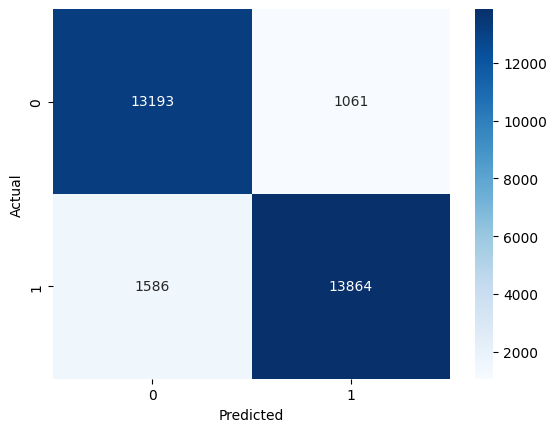

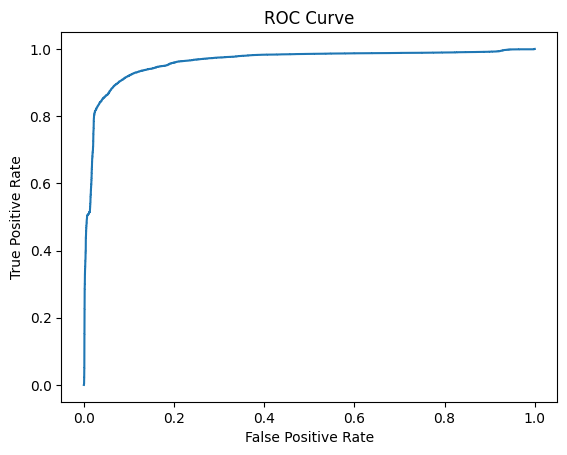

AUC Score: 0.9614353570427968


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Display the classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, perceptron.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# AUC Score
auc = roc_auc_score(y_test, perceptron.decision_function(X_test))
print("AUC Score:", auc)
